## Look at Tall's first steps

In [20]:
import matplotlib.pyplot as plt
import xarray as xr

In [27]:
# specify the bad grid point and a a region around it
ibad, jbad = 364-1, 236-1
ss = 20
yslice = slice(ibad-ss, ibad+ss)
xslice = slice(jbad-ss, jbad+ss)

In [36]:
# start with u velocity because that is what blew
uvel = xr.open_dataset('/data/sallen/results/MEOPAR/Tall/SalishSea_1ts_20190811_20190811_grid_U.nc')

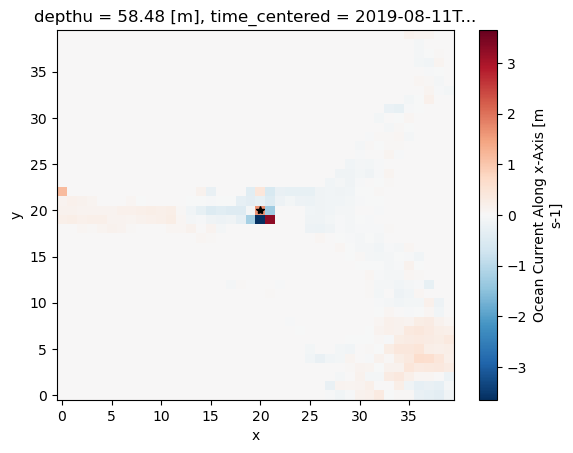

In [29]:
uvel.vozocrtx[7, 25-1, yslice, xslice].plot();
plt.plot(ss, ss, 'k*');

In [37]:
# Need to check out the salinity
gridT = xr.open_dataset('/data/sallen/results/MEOPAR/Tall/SalishSea_1ts_20190811_20190811_grid_T.nc')

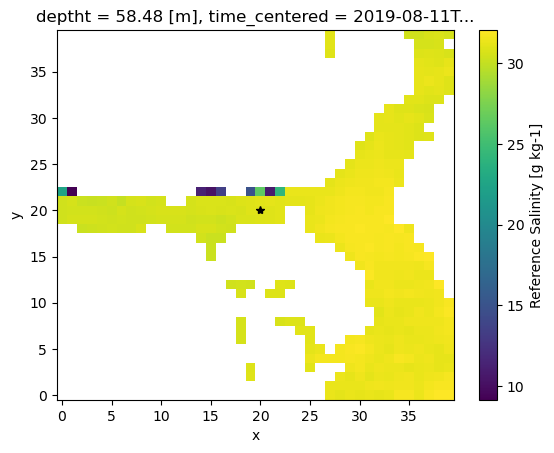

In [34]:
(gridT.vosaline[7, 25-1, yslice, xslice].
               where(gridT.vosaline[7, 25-1, yslice, xslice] !=0).plot());
plt.plot(ss, ss, 'k*');

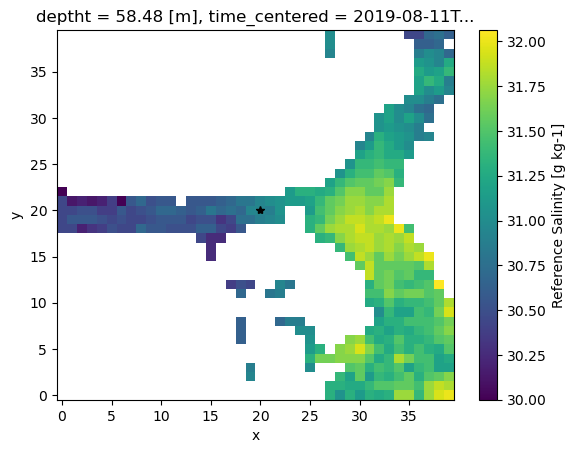

In [51]:
# very low salinity seen at north of the channel, check out the first time step
(gridT.vosaline[0, 25-1, yslice, xslice].
               where(gridT.vosaline[0, 25-1, yslice, xslice] !=0).plot());
plt.plot(ss, ss, 'k*');

In [39]:
# problem, there should not be near zero salinities at 58 m depth

In [52]:
print (25-1, ibad-1, jbad, gridT.vosaline[1, 25-1, ibad+1, jbad], gridT.vosaline[0, 25-1, ibad, jbad].values)

24 362 235 <xarray.DataArray 'vosaline' ()>
[1 values with dtype=float32]
Coordinates:
    nav_lat        float32 ...
    nav_lon        float32 ...
    deptht         float32 58.48
    time_centered  datetime64[ns] ...
    time_counter   datetime64[ns] 2019-08-11T00:01:00
Attributes:
    standard_name:       sea_water_reference_salinity
    long_name:           Reference Salinity
    units:               g kg-1
    online_operation:    average
    interval_operation:  40 s
    interval_write:      40 s
    cell_methods:        time: mean
    cell_measures:       area: area 30.9375


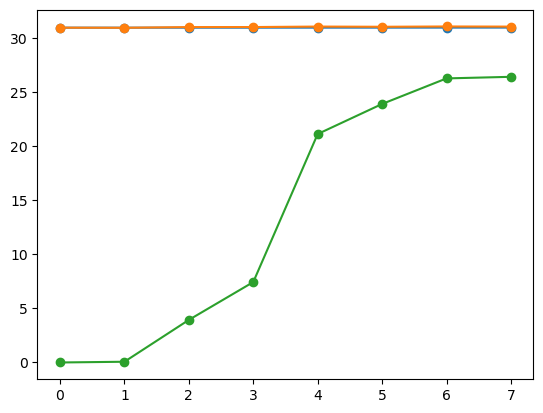

In [59]:
plt.plot(gridT.vosaline[:, 25-1, ibad, jbad], 'o-');
plt.plot(gridT.vosaline[:, 25-1, ibad+1, jbad], 'o-');
plt.plot(gridT.vosaline[:, 25-1, ibad+2, jbad], 'o-');

In [60]:
print(gridT.vosaline[:, 25-1, ibad+2, jbad].values)

[ 0.          0.06773195  3.9344697   7.430602   21.109924   23.88741
 26.249521   26.396385  ]


In [61]:
print (25-1, ibad+2, jbad)

24 365 235


In [62]:
# Restart Files

In [64]:
# Mine
myrestart = xr.open_dataset('/home/sallen/MEOPAR/ANALYSIS/analysis-abdoul/notebooks/bathy/restart_PHYBIO_13903920_10aug19_202310.nc')

In [67]:
ik, ii, ij = 24, 365, 235
print ('myrestart', myrestart.sn[0, ik, ii, ij].values)

myrestart 30.875


In [69]:
# Tall on ocean
tallocean = xr.open_dataset('/ocean/atall/MOAD//analysis-abdoul/notebooks/bathy/restart_PHYBIO_13903920_10aug19_202310.nc')

In [71]:
print ('tall_ocean', tallocean.sn[0, ik, ii, ij].values)

tall_ocean 30.875


In [73]:
# New 1ts on graham
graham1ts = xr.open_dataset('/data/sallen/results/MEOPAR/Tall/ter_oct26_240/SalishSea_1ts_20190811_20190811_grid_T.nc')

In [76]:
graham1ts.close()
#print ('graham1ts', graham1ts.vosaline[0, ik, ii, ij].values)

In [77]:
# Forcing Restart on Graham
graham = xr.open_dataset('/data/sallen/results/MEOPAR/Tall/ter_oct26_240/restart_PHYBIO_13903920_10aug19_202310.nc')

In [78]:
print ('graham restart', graham.sn[0, ik, ii, ij].values)

graham restart 30.875


In [79]:
abort = xr.open_dataset('/data/sallen/results/MEOPAR/Tall/ter_oct26_240/output.abort.nc')

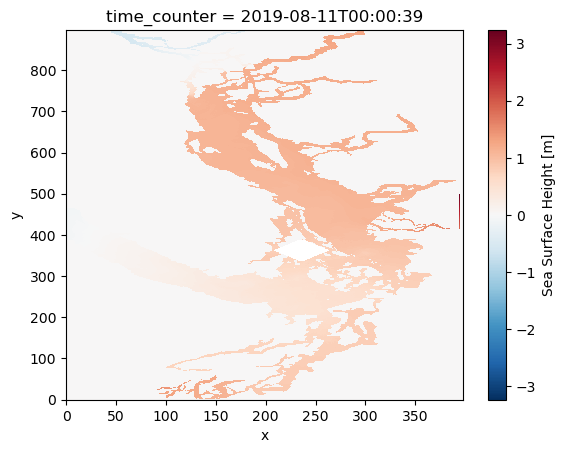

In [80]:
abort.sossheig.plot()

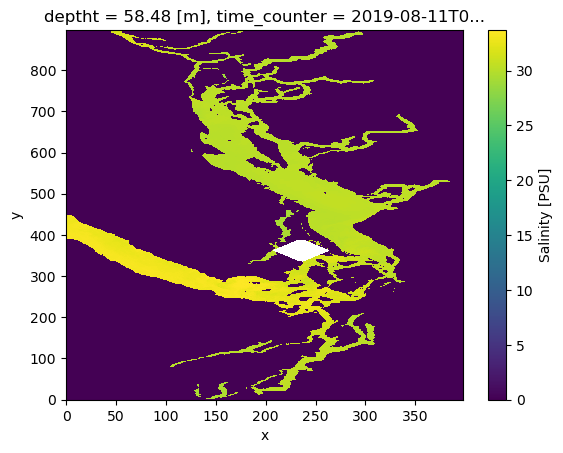

In [81]:
abort.vosaline[0, ik].plot()

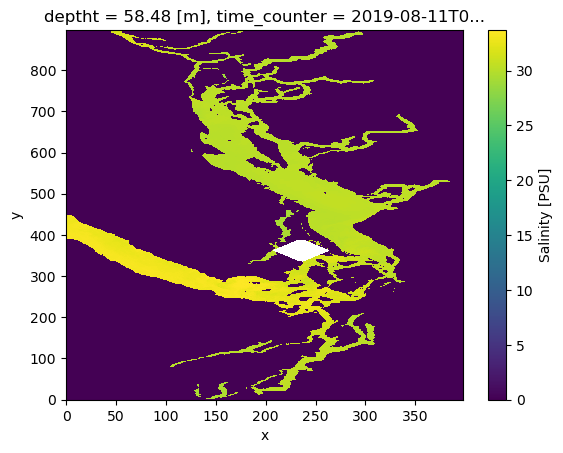

In [82]:
abort.vosaline[0, ik].plot()

In [89]:
fivets = xr.open_dataset('/data/sallen/results/MEOPAR/Tall/ter_oct28_847/SalishSea_5ts_20190811_20190811_grid_T.nc')
fivev = xr.open_dataset('/data/sallen/results/MEOPAR/Tall/ter_oct28_847/SalishSea_5ts_20190811_20190811_grid_V.nc')

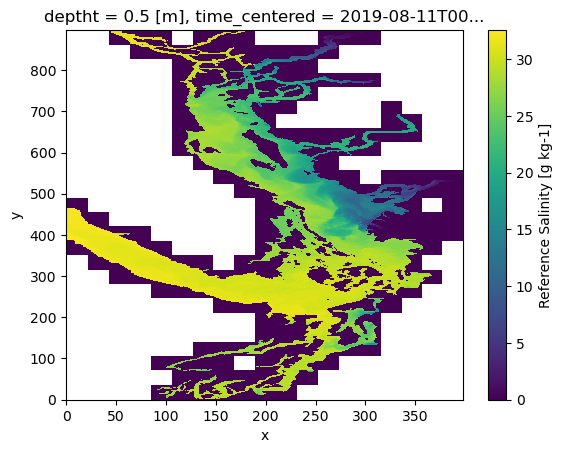

In [84]:
fivets.vosaline[0, 0].plot()

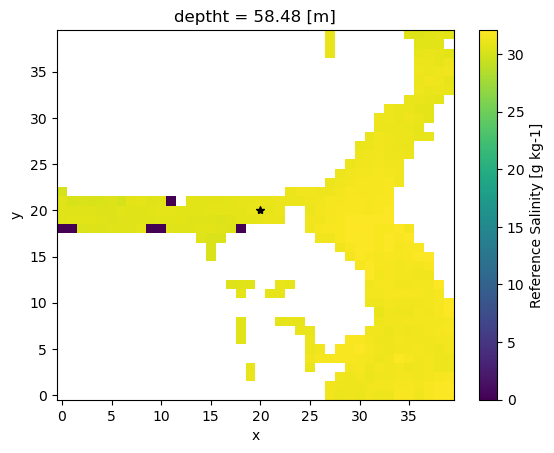

In [85]:
(fivets.vosaline[0, 25-1, yslice, xslice].
               where(gridT.vosaline[0, 25-1, yslice, xslice] !=0).plot());
plt.plot(ss, ss, 'k*');

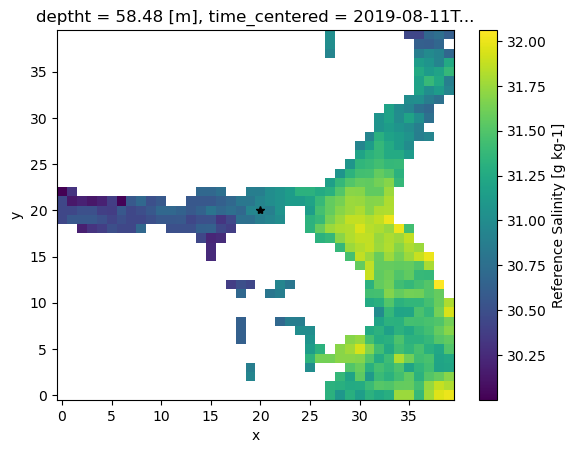

In [86]:
(fivets.vosaline[0, 25-1, yslice, xslice].
               where(fivets.vosaline[0, 25-1, yslice, xslice] !=0).plot());
plt.plot(ss, ss, 'k*');

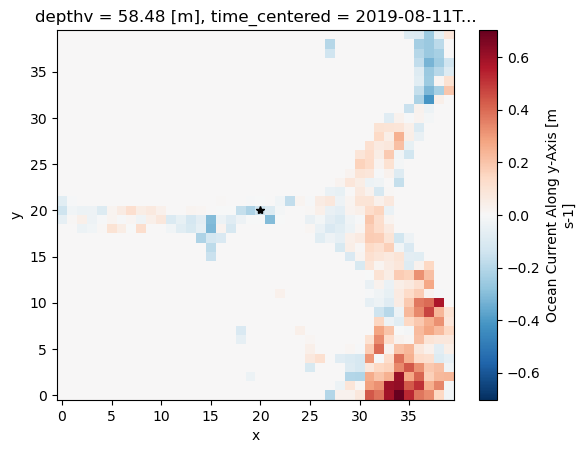

In [90]:
(fivev.vomecrty[0, 25-1, yslice, xslice].plot());
plt.plot(ss, ss, 'k*');

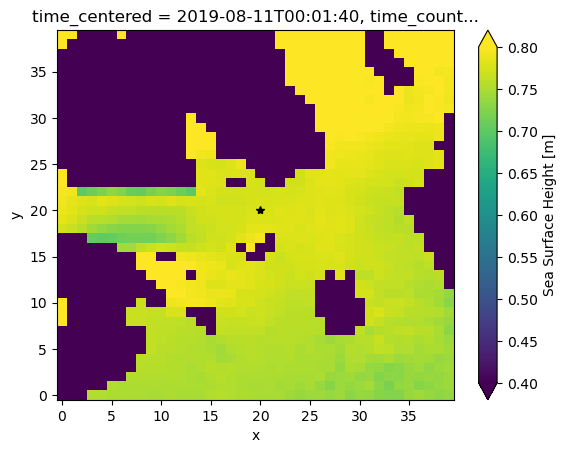

In [95]:
(fivets.sossheig[0, yslice, xslice].plot(vmax=0.8, vmin=0.4));
plt.plot(ss, ss, 'k*');

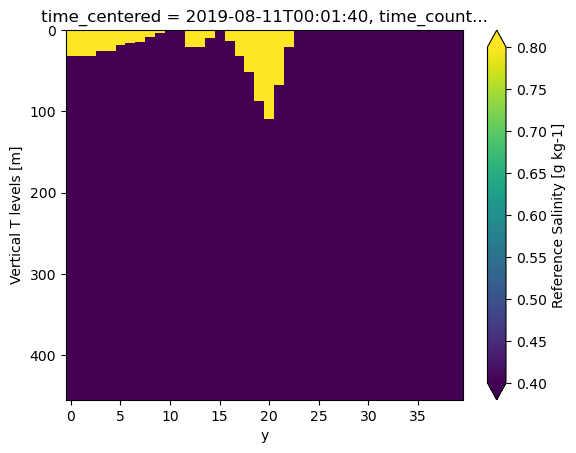

In [101]:
(fivets.vosaline[0, :, yslice, jbad-10].plot(vmax=0.8, vmin=0.4, yincrease=False));

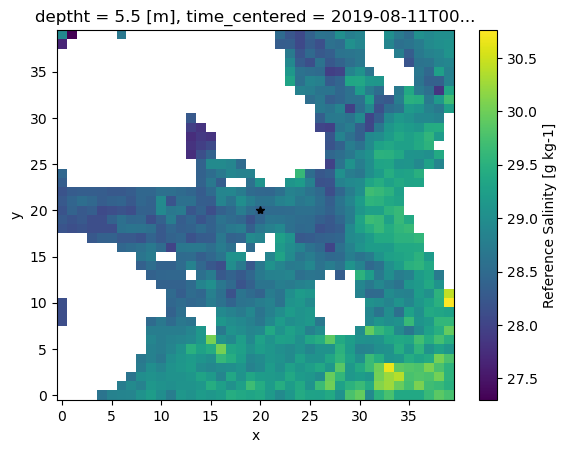

In [109]:
id = 5
(fivets.vosaline[0, id, yslice, xslice].
               where(fivets.vosaline[0, id, yslice, xslice] !=0).plot());
plt.plot(ss, ss, 'k*');

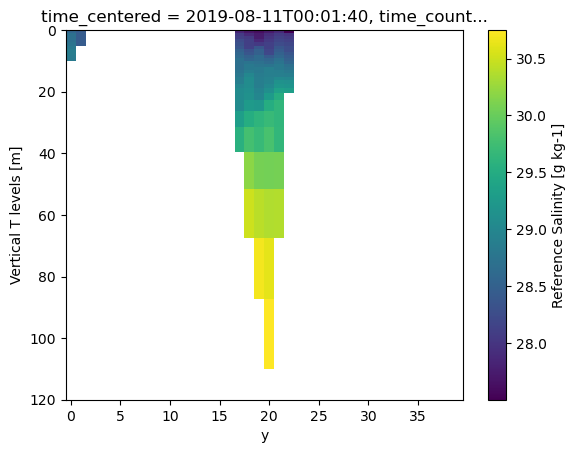

In [121]:
(fivets.vosaline[0, :, ibad-20:ibad+20, jbad-15].
               where(fivets.vosaline[0, :, ibad-20:ibad+20, jbad-15] !=0).plot(yincrease=False))
plt.ylim(120, 0);

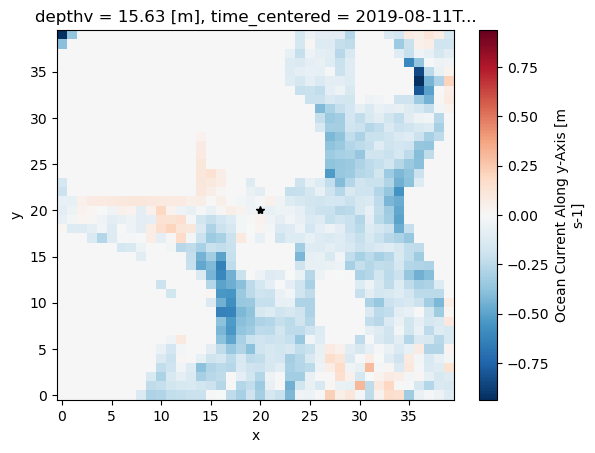

In [125]:
(fivev.vomecrty[0, 15, yslice, xslice].plot());
plt.plot(ss, ss, 'k*');

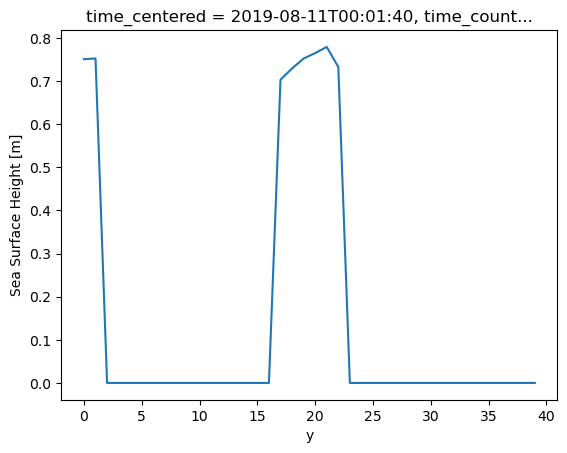

In [127]:
(fivets.sossheig[0, ibad-20:ibad+20, jbad-15].plot());

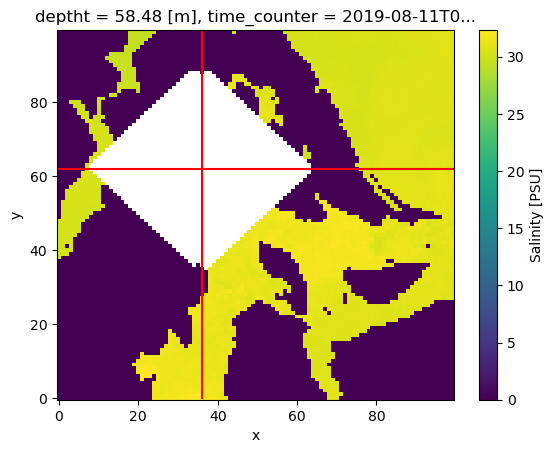

In [135]:
abort.vosaline[0, ik, 300:400, 200:300].plot()
plt.plot([0, 100], [62, 62], 'r-')
plt.plot([36, 36], [0, 100], 'r-')
tibad, tjbad = 362, 236

In [136]:
print (ibad, jbad)

363 235


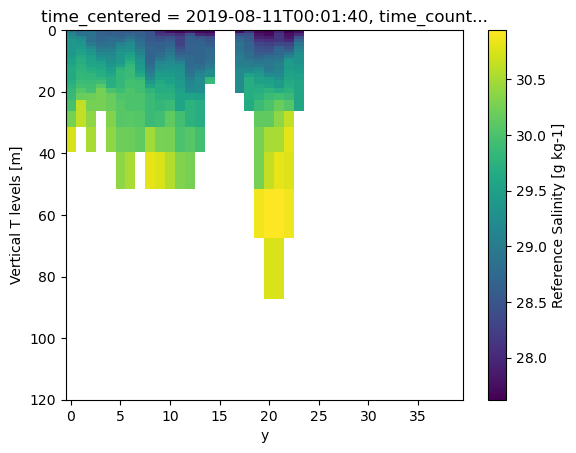

In [137]:
(fivets.vosaline[0, :, ibad-20:ibad+20, jbad].
               where(fivets.vosaline[0, :, ibad-20:ibad+20, jbad] !=0).plot(yincrease=False))
plt.ylim(120, 0);

(27.0, 31.5)

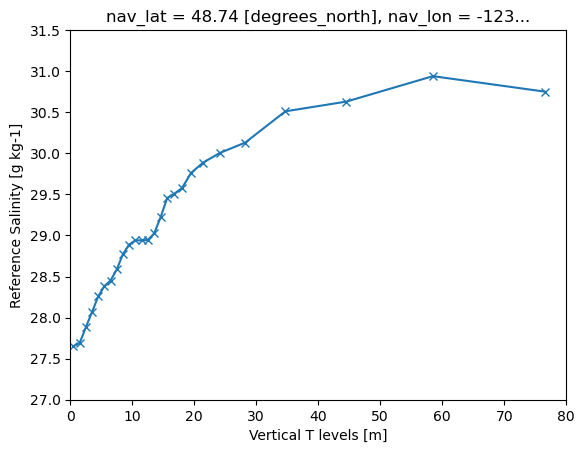

In [148]:
(fivets.vosaline[0, :, ibad, jbad]
 .where(fivets.vosaline[0, :, ibad, jbad] !=0).plot(marker='x'));
plt.xlim(0, 80)
plt.ylim(27, 31.5)